In [1]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# List of years for the datasets
years = [2019, 2020, 2021, 2022, 2023]

# Load and concatenate the datasets
df_list = [pd.read_csv(f'finalData/NBA{year}.csv') for year in years]
nba_data = pd.concat(df_list, ignore_index=True)

nba_data['GameID'] = nba_data.apply(lambda row: f"{row['Date']}_{sorted([row['Team'], row['Opponent']])[0]}_{sorted([row['Team'], row['Opponent']])[1]}", axis=1)
                                    



/var/folders/7p/lxd_ccrx4_s2kfc0f3nyhnw80000gn/T/ipykernel_72777/1713470364.py:8: DtypeWarning: Columns (45) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(f'finalData/NBA{year}.csv') for year in years]
/var/folders/7p/lxd_ccrx4_s2kfc0f3nyhnw80000gn/T/ipykernel_72777/1713470364.py:8: DtypeWarning: Columns (47) have mixed types. Specify dtype option on import or set low_memory=False.
  df_list = [pd.read_csv(f'finalData/NBA{year}.csv') for year in years]
/var/folders/7p/lxd_ccrx4_s2kfc0f3nyhnw80000gn/T/ipykernel_72777/1713470364.py:11: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nba_data['GameID'] = nba_data.apply(lambda row: f"{row['Date']}_{sorted([row['Team'], row['Opponent']])[0]}_{sorted([row['Team']

In [2]:
# Finding the underdog and over/under value
over_under_values = {}
for game_id in nba_data['GameID'].unique():
    game_df = nba_data[nba_data['GameID'] == game_id]
    if game_df.shape[0] == 2:  # Ensure there are exactly two teams (two entries per game)
        underdog_entry = game_df.loc[game_df['ML'].idxmax()]  # The underdog has the maximum ML value if positive or least negative
        over_under_values[game_id] = underdog_entry['Close']

# Applying the over/under value from the underdog to both teams
nba_data['Adjusted_Close'] = nba_data['GameID'].map(over_under_values)

print(nba_data)

      Team Opponent Location        Date WL_team  MIN_team  PTS_team  \
0      GSW      OKC        H  2018-10-16       W       240       108   
1      OKC      GSW        V  2018-10-16       L       240       100   
2      BOS      PHI        H  2018-10-16       W       240       105   
3      PHI      BOS        V  2018-10-16       L       240        87   
4      MEM      IND        V  2018-10-17       L       240        83   
...    ...      ...      ...         ...     ...       ...       ...   
10341  HOU      LAL        V  2023-01-16       L       240       132   
10342  ATL      MIA        H  2023-01-16       W       240       121   
10343  WAS      GSW        H  2023-01-16       L       240       118   
10344  BOS      CHA        V  2023-01-16       W       240       130   
10345  CHA      BOS        H  2023-01-16       L       240       118   

       PTS_team_rolling_avg  FGM_team  FGA_team  ...  ORtg_opponent  \
0                108.000000        42        95  ...      94.091

/var/folders/7p/lxd_ccrx4_s2kfc0f3nyhnw80000gn/T/ipykernel_72777/973368142.py:10: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nba_data['Adjusted_Close'] = nba_data['GameID'].map(over_under_values)


In [3]:
# Convert 'Close' to float, coercing errors to NaN
nba_data['Adjusted_Close'] = pd.to_numeric(nba_data['Adjusted_Close'], errors='coerce')

# Check the data type again to confirm the conversion
print(nba_data['Adjusted_Close'].dtype)

# Optionally, check for any NaN values that resulted from the conversion
print(nba_data['Adjusted_Close'].isnull().sum())

# If there are NaN values and you decide to drop them
nba_data.dropna(subset=['Adjusted_Close'], inplace=True)

nba_data['Total_Score'] = nba_data['Final'] + nba_data['PTS_opponent']

# Continue with your calculations or further data preparation
# For example, recreating the 'over_under' column:
nba_data['over_under'] = (nba_data['Total_Score'] > nba_data['Adjusted_Close']).astype(int)

# Verify the changes
print(nba_data[['Total_Score', 'Adjusted_Close', 'over_under']].head())

#print the number of 0s and 1s in the over_under column
print(nba_data['over_under'].value_counts())

float64
1416
   Total_Score  Adjusted_Close  over_under
0        208.0           220.5           0
1        208.0           220.5           0
2        192.0           211.5           0
3        192.0           211.5           0
4        194.0           204.5           0
over_under
1    4503
0    4427
Name: count, dtype: int64


/var/folders/7p/lxd_ccrx4_s2kfc0f3nyhnw80000gn/T/ipykernel_72777/1352405380.py:13: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nba_data['Total_Score'] = nba_data['Final'] + nba_data['PTS_opponent']
/var/folders/7p/lxd_ccrx4_s2kfc0f3nyhnw80000gn/T/ipykernel_72777/1352405380.py:17: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  nba_data['over_under'] = (nba_data['Total_Score'] > nba_data['Adjusted_Close']).astype(int)


In [4]:
#save all the column types to a list
column_types = nba_data.dtypes

#print(column_types)

#check for any missing values
missing_values = nba_data.isnull().sum()

#print(missing_values)

#total number of missing values
total_missing = missing_values.sum()

print(total_missing)

# #drop the missing values
nba_data.dropna(inplace=True)

train_data = nba_data[nba_data['season'] < 2022]
val_data = nba_data[nba_data['season'] == 2022]
test_data = nba_data[nba_data['season'] == 2023]

# Check the distribution
print("Training Data Size:", train_data.shape[0])
print("Validation Data Size:", val_data.shape[0])
print("Test Data Size:", test_data.shape[0])

1
Training Data Size: 5653
Validation Data Size: 2124
Test Data Size: 1152


         Date WL_team  MIN_team  PTS_team  PTS_team_rolling_avg  FGM_team  \
0  2018-10-16       W       240       108                 108.0        42   
1  2018-10-16       L       240       100                 100.0        33   
2  2018-10-16       W       240       105                 105.0        42   
3  2018-10-16       L       240        87                  87.0        34   
4  2018-10-17       L       240        83                  83.0        25   

   FGA_team  FGP_team  FGP_team_rolling_avg  ThreePM_team  ...  Opponent_ORL  \
0        95      44.2                  44.2             7  ...         False   
1        91      36.3                  36.3            10  ...         False   
2        97      43.3                  43.3            11  ...         False   
3        87      39.1                  39.1             5  ...         False   
4        84      29.8                  29.8            10  ...         False   

   Opponent_PHI  Opponent_POR  Opponent_SAC  Opponent_SA

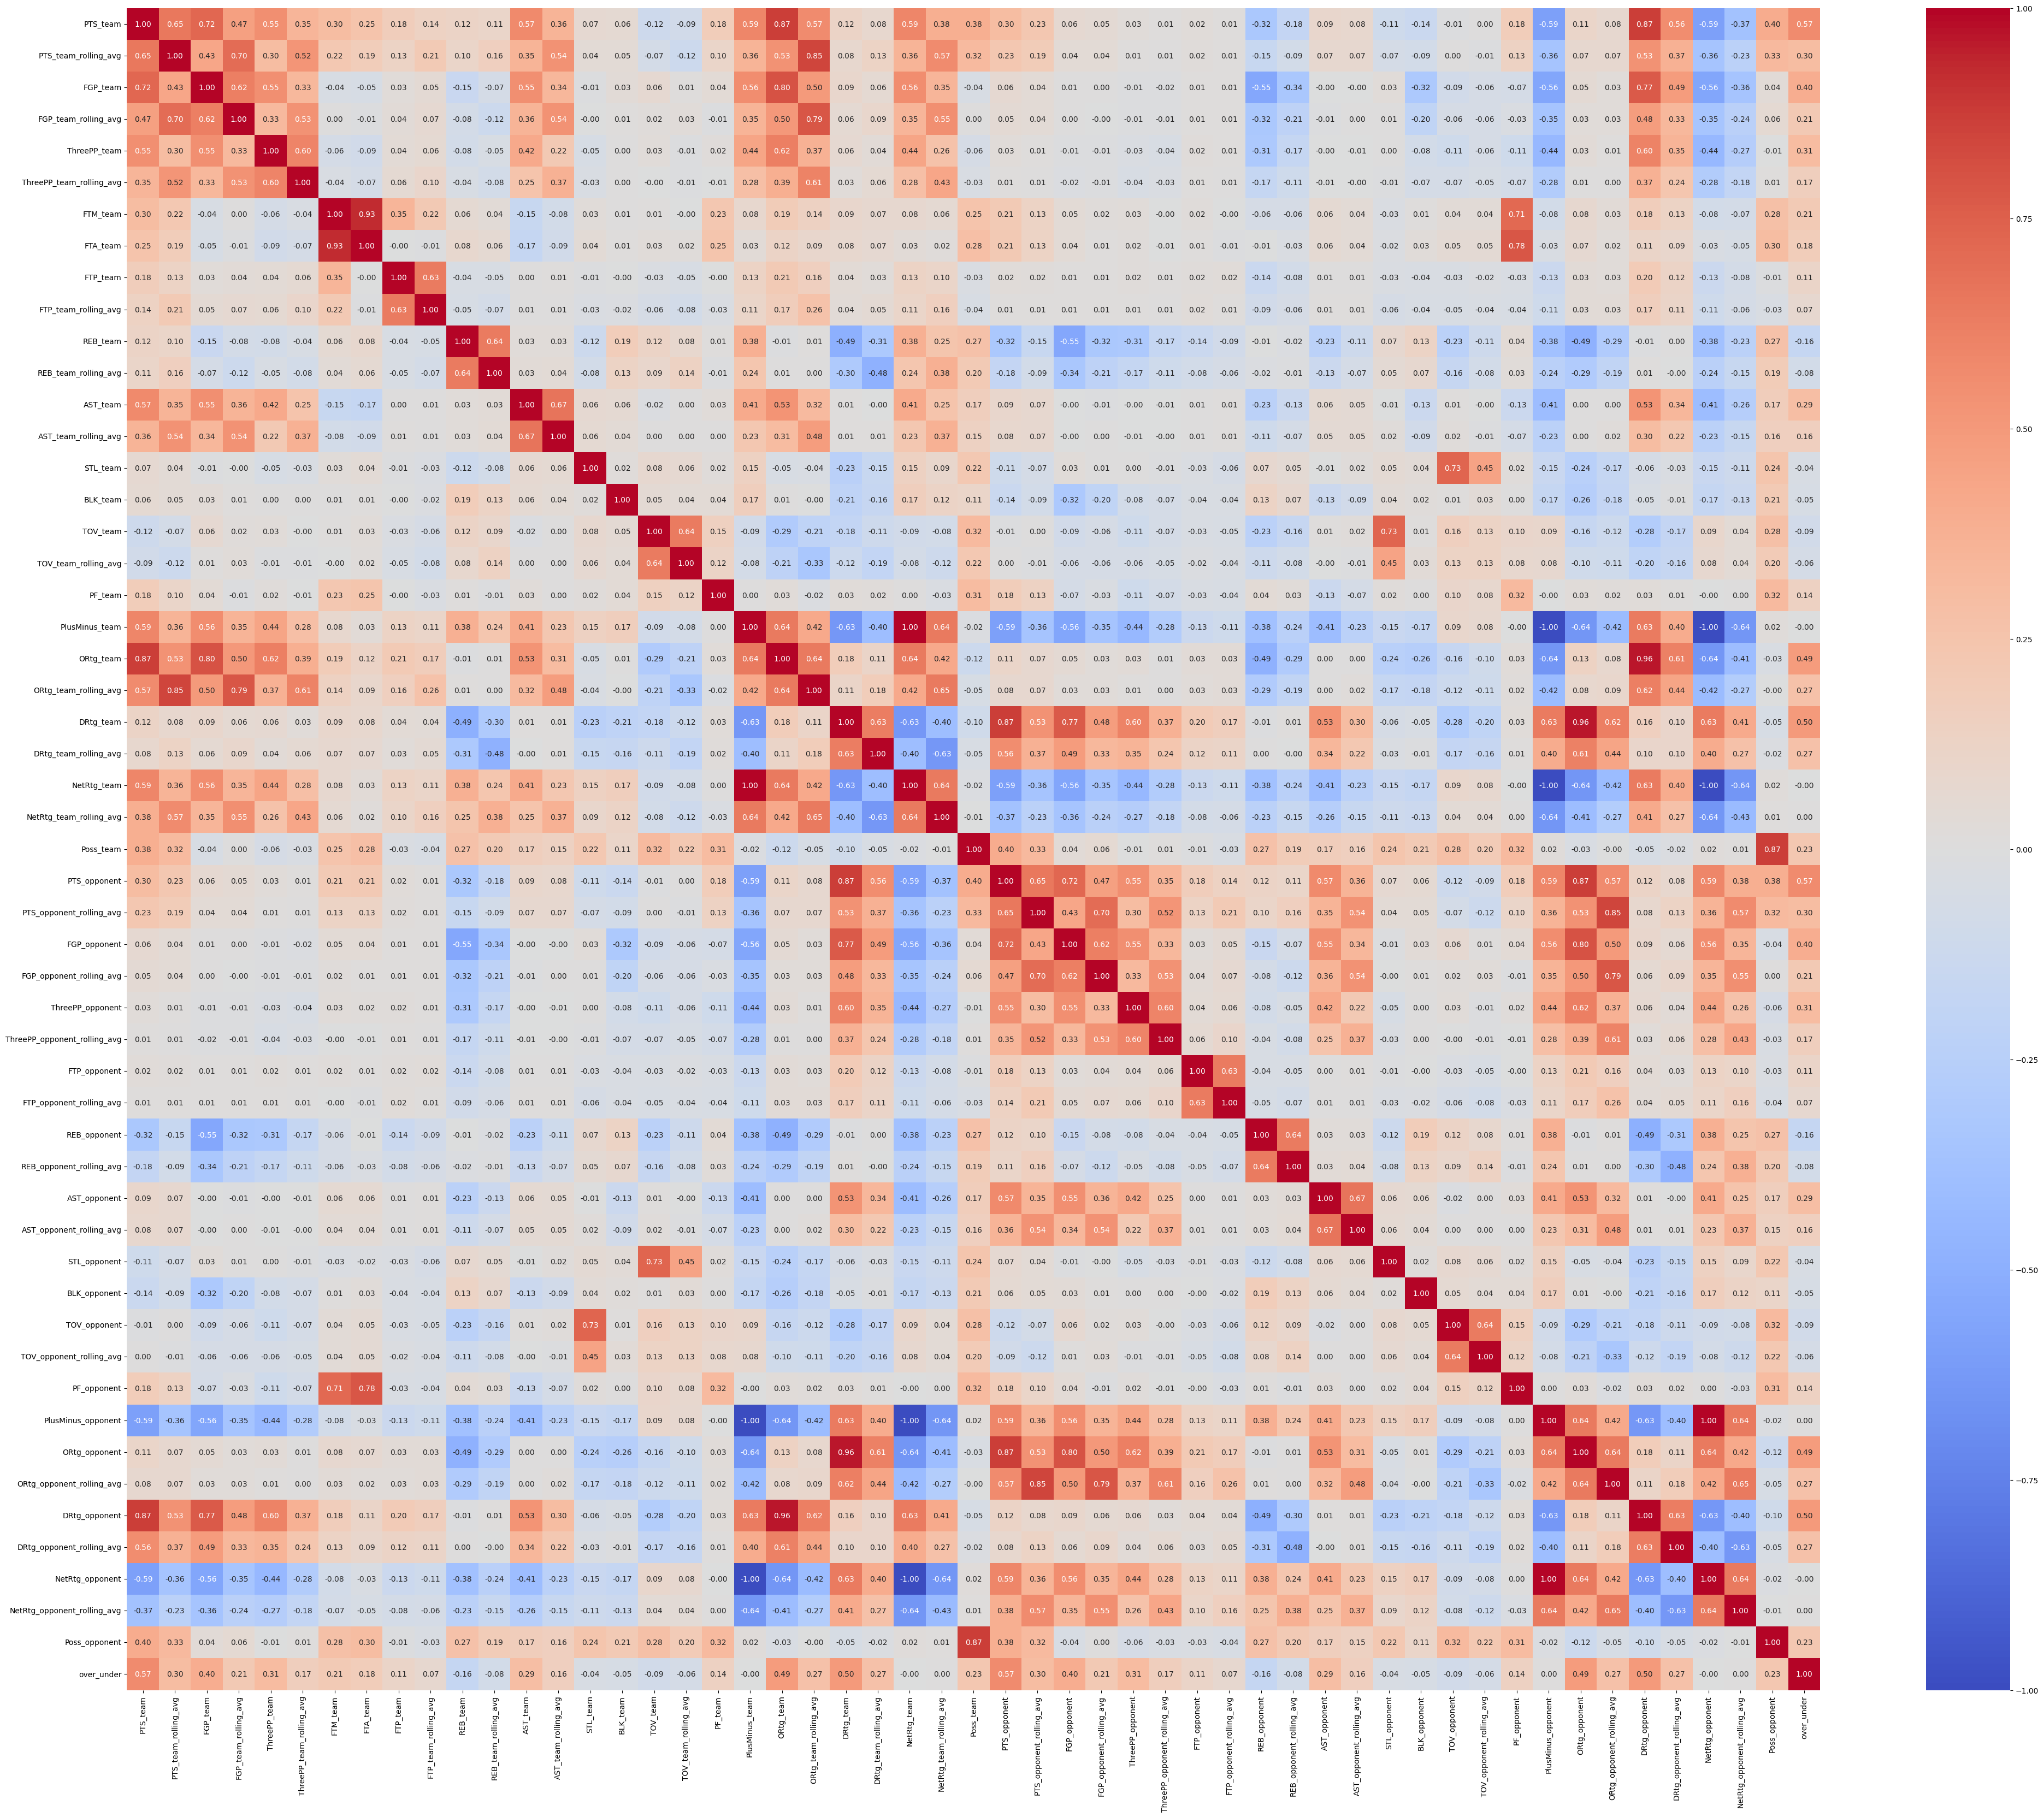

In [5]:
import seaborn as sns
import matplotlib.pyplot as plt

#one hot encoding
df = pd.get_dummies(nba_data, columns=['Team', 'Opponent', 'Location'])

# Assuming you've determined a list of potential features including new engineered features
team_opponent_features = [
    "PTS_team", "PTS_team_rolling_avg", "FGP_team", "FGP_team_rolling_avg", "ThreePP_team", "ThreePP_team_rolling_avg",
    "FTM_team", "FTA_team", "FTP_team", "FTP_team_rolling_avg", "REB_team", "REB_team_rolling_avg",
    "AST_team", "AST_team_rolling_avg", "STL_team", "BLK_team", "TOV_team", "TOV_team_rolling_avg", "PF_team", "PlusMinus_team",
    "ORtg_team", "ORtg_team_rolling_avg", "DRtg_team", "DRtg_team_rolling_avg", "NetRtg_team", "NetRtg_team_rolling_avg", "Poss_team",
    "PTS_opponent", "PTS_opponent_rolling_avg", "FGP_opponent", "FGP_opponent_rolling_avg", "ThreePP_opponent", "ThreePP_opponent_rolling_avg",
    "FTP_opponent", "FTP_opponent_rolling_avg", "REB_opponent", "REB_opponent_rolling_avg", "AST_opponent", "AST_opponent_rolling_avg",
    "STL_opponent", "BLK_opponent", "TOV_opponent", "TOV_opponent_rolling_avg", "PF_opponent", "PlusMinus_opponent", "ORtg_opponent",
    "ORtg_opponent_rolling_avg", "DRtg_opponent", "DRtg_opponent_rolling_avg", "NetRtg_opponent", "NetRtg_opponent_rolling_avg", "Poss_opponent",
]

# Include the target
# Initialize the StandardScaler
# scaler = StandardScaler()

# # Scale the numeric features
# df[team_opponent_features] = scaler.fit_transform(df[team_opponent_features])
# # Ensure 'Team' and 'Opponent' columns are present in the DataFrame
# df = df.reindex(columns=team_opponent_features + ['over_under'])


# Display the first few rows to verify the transformation
print(df.head())

# Compute the correlation matrix
correlation_matrix = df[team_opponent_features + ['over_under']].corr()

# Plotting the correlation matrix
plt.figure(figsize=(50, 40))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
features_with_target = team_opponent_features + ['over_under']

In [6]:
#print out all the correlation matrix values
print(correlation_matrix['over_under'])

#save the correlation matrix to a csv file
correlation_matrix['over_under'].to_csv('team_correlation_matrix.csv')

high_corr_team_features = correlation_matrix.index[abs(correlation_matrix['over_under']) > 0.2].tolist()

# Print the highly correlated features
print(high_corr_team_features)

PTS_team                        0.569878
PTS_team_rolling_avg            0.302240
FGP_team                        0.396816
FGP_team_rolling_avg            0.213984
ThreePP_team                    0.309393
ThreePP_team_rolling_avg        0.171242
FTM_team                        0.209667
FTA_team                        0.180598
FTP_team                        0.112909
FTP_team_rolling_avg            0.071488
REB_team                       -0.164146
REB_team_rolling_avg           -0.080814
AST_team                        0.290199
AST_team_rolling_avg            0.156789
STL_team                       -0.041322
BLK_team                       -0.053586
TOV_team                       -0.089682
TOV_team_rolling_avg           -0.063477
PF_team                         0.140648
PlusMinus_team                 -0.000084
ORtg_team                       0.490550
ORtg_team_rolling_avg           0.268630
DRtg_team                       0.496302
DRtg_team_rolling_avg           0.271121
NetRtg_team     

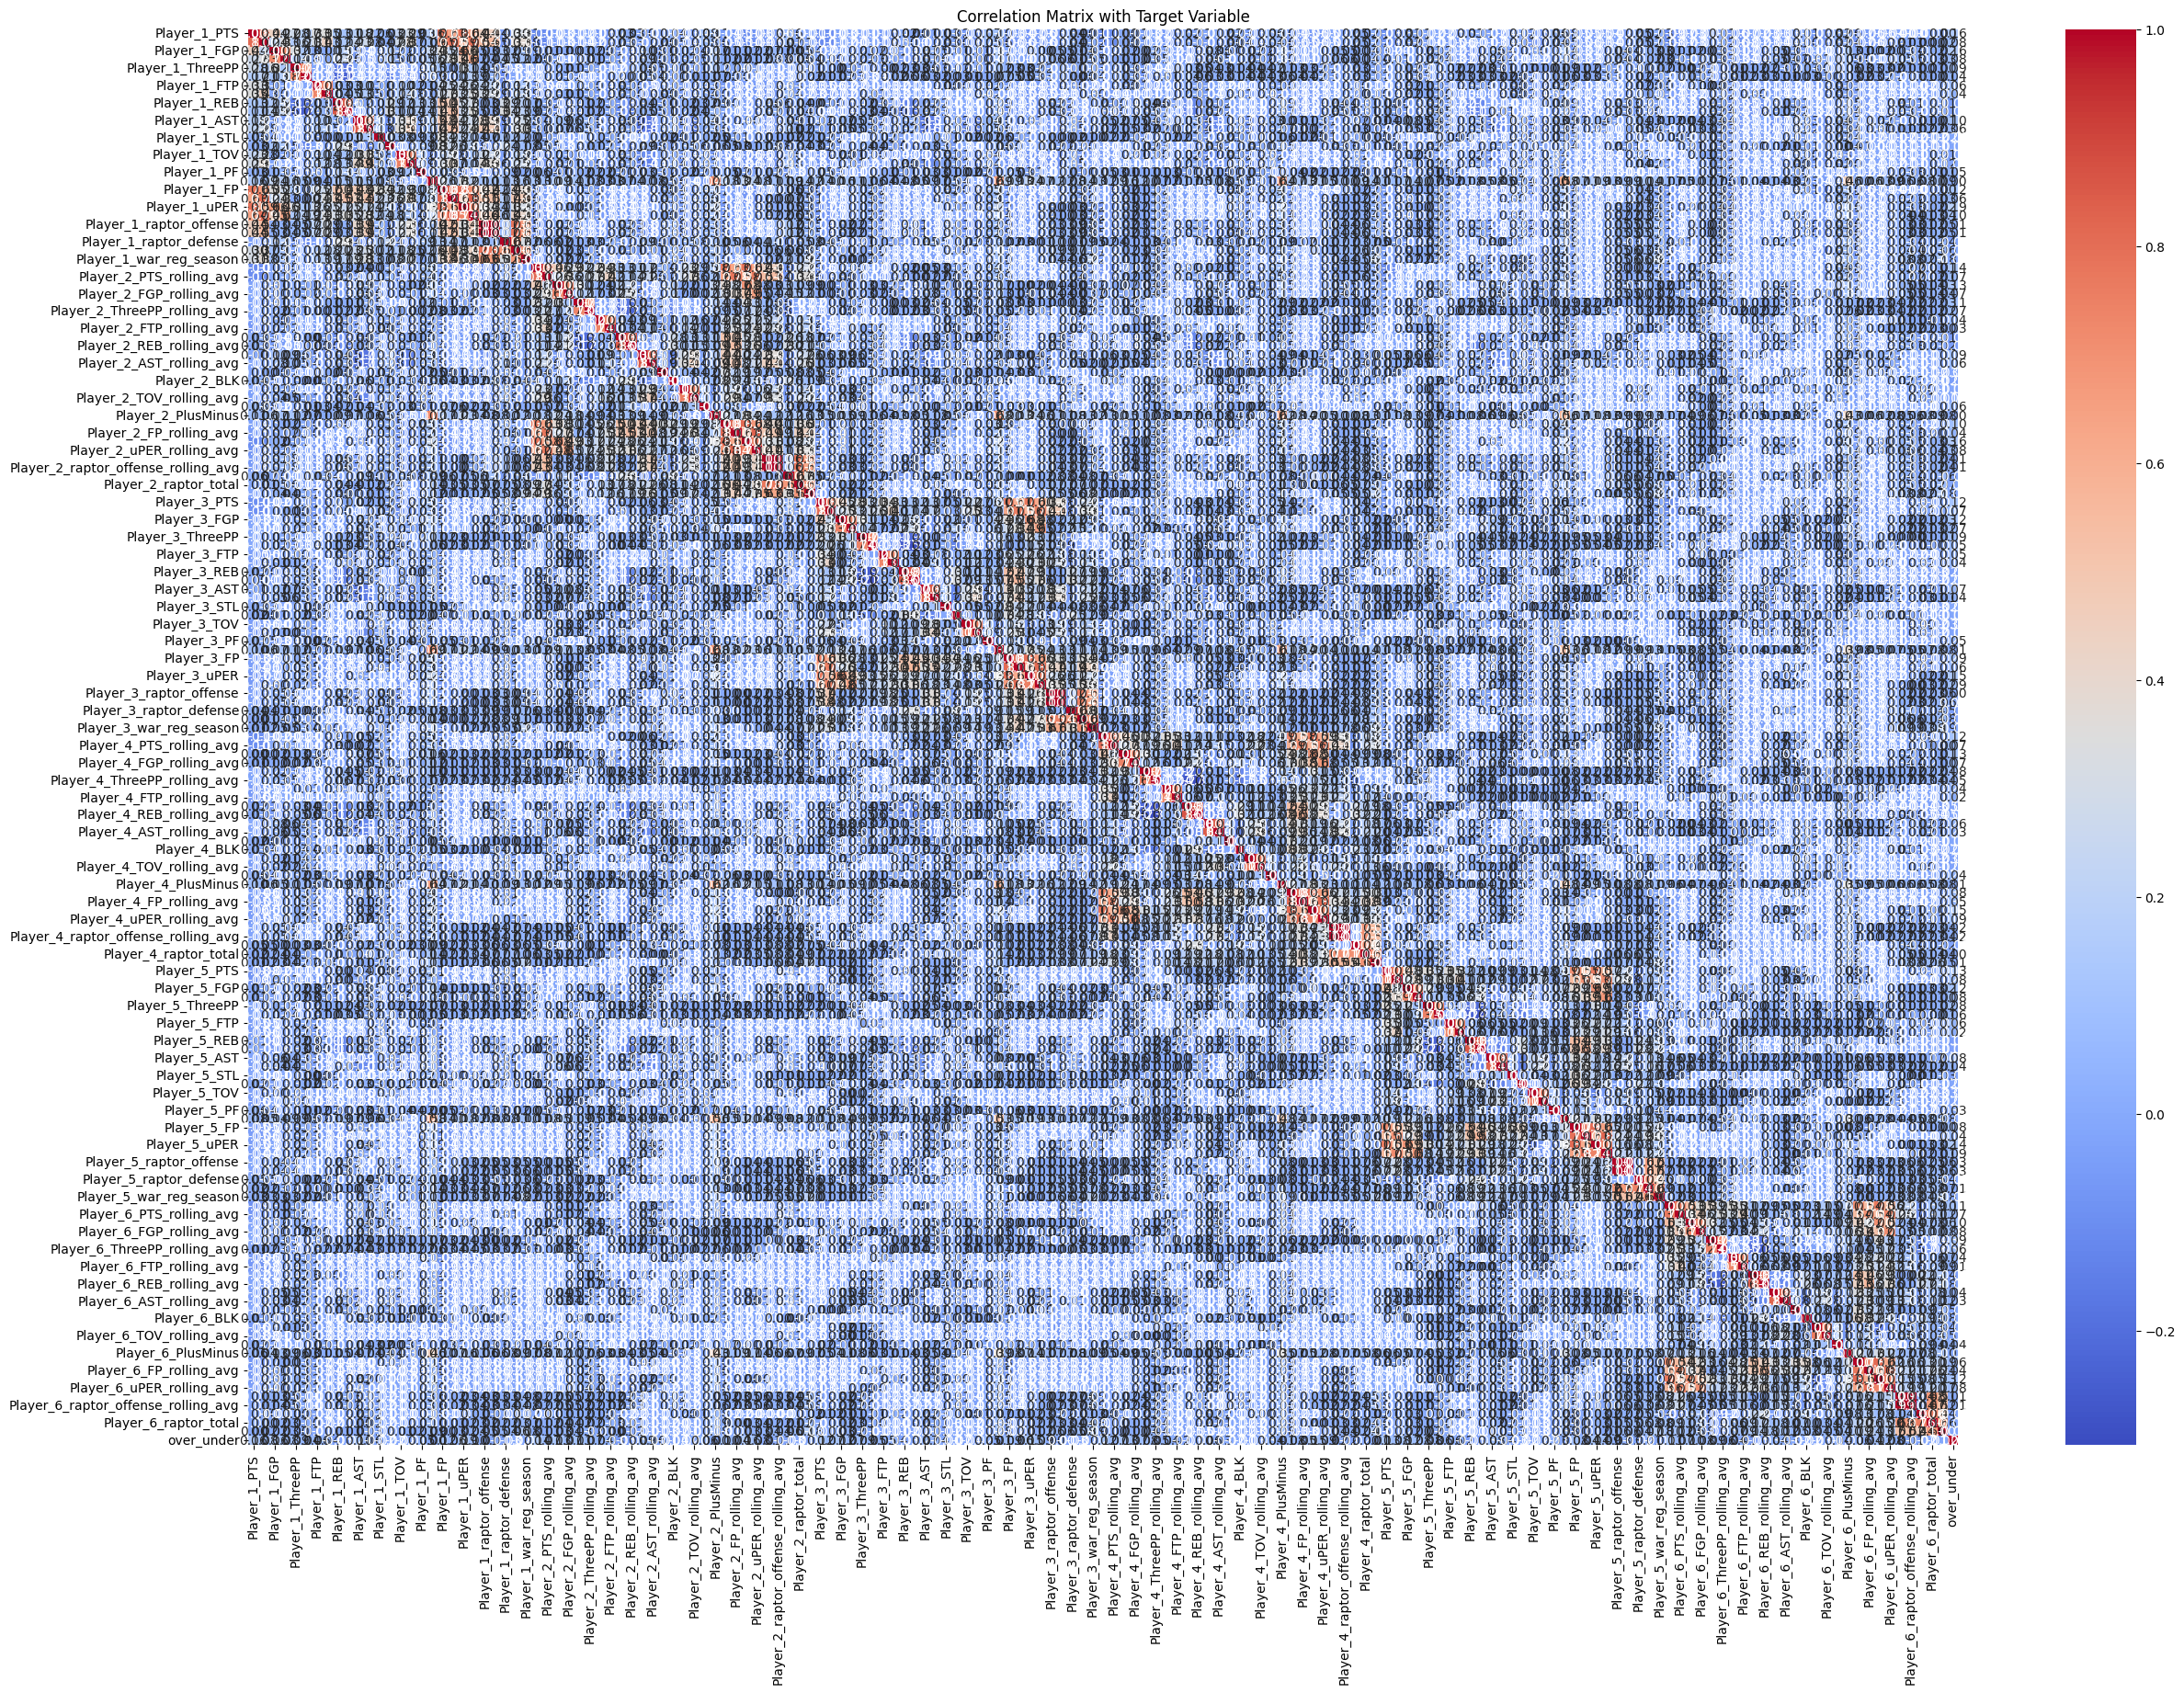

In [7]:
# Base player features for one player
base_player_features = [
    "PTS", "PTS_rolling_avg", "FGP", "FGP_rolling_avg",
    "ThreePP", "ThreePP_rolling_avg", "FTP", "FTP_rolling_avg",
    "REB", "REB_rolling_avg", "AST", "AST_rolling_avg",
    "STL", "BLK", "TOV", "TOV_rolling_avg",
    "PF", "PlusMinus", "FP", "FP_rolling_avg",
    "uPER", "uPER_rolling_avg", "raptor_offense", "raptor_offense_rolling_avg",
    "raptor_defense", "raptor_total", "war_reg_season"
]

# Generate features for all players
all_player_features = []
for i in range(1, 7):  # For players 1 to 6
    player_features = [f"Player_{i}_{feature}" for feature in base_player_features]
    all_player_features.extend(player_features)

# df_encoded = pd.get_dummies(df, columns=['Team', 'Opponent', 'Location'])  # Assuming 'Team' and 'Opponent' are categorical
# df_encoded = df_encoded[columns_to_keep]  # Fix: Use df_encoded instead of df

#scale the player features
#df[all_player_features] = scaler.fit_transform(df[all_player_features])


features_with_target = all_player_features + ['over_under']
# Now compute the correlation matrix with these new numeric columns
correlation_matrix = df[features_with_target].corr()

# Plotting the correlation matrix
plt.figure(figsize=(30, 20))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix with Target Variable')
plt.show()

In [8]:
#print out all the correlation matrix values
print(correlation_matrix['over_under'])

#save the correlation matrix to a csv file
correlation_matrix['over_under'].to_csv('player_correlation_matrix.csv')

#get all the columns above/below +0.1/-0.1 correlation
high_corr_player_features = correlation_matrix.index[abs(correlation_matrix['over_under']) > 0.07].tolist()

# Print the highly correlated features
print(high_corr_player_features)

Player_1_PTS                           0.158446
Player_1_PTS_rolling_avg               0.076054
Player_1_FGP                           0.156470
Player_1_FGP_rolling_avg               0.077834
Player_1_ThreePP                       0.088864
                                         ...   
Player_6_raptor_offense_rolling_avg    0.011386
Player_6_raptor_defense               -0.021664
Player_6_raptor_total                 -0.009988
Player_6_war_reg_season               -0.015653
over_under                             1.000000
Name: over_under, Length: 163, dtype: float64
['Player_1_PTS', 'Player_1_PTS_rolling_avg', 'Player_1_FGP', 'Player_1_FGP_rolling_avg', 'Player_1_ThreePP', 'Player_1_AST', 'Player_1_FP', 'Player_1_uPER', 'Player_1_uPER_rolling_avg', 'Player_2_PTS', 'Player_2_PTS_rolling_avg', 'Player_2_FGP', 'Player_2_ThreePP', 'Player_2_AST', 'Player_2_FP', 'Player_2_uPER', 'Player_2_uPER_rolling_avg', 'Player_3_PTS', 'Player_3_PTS_rolling_avg', 'Player_3_FGP', 'Player_3_ThreePP', 'Pl

In [9]:
#get the following features, but only for player 1 from the high_corr_player_features list
player_1_features = [feature for feature in high_corr_player_features if 'Player_1' in feature]
#take out the 'Player_1_' part of the feature names
iso_player_features = [feature.replace('Player_1_', '') for feature in player_1_features]

#primt length of player_features
print(len(iso_player_features))

#get all player features, from players 1-6
six_player_features = []
for i in range(1, 7):  # For players 1 to 6
    player_features = [f"Player_{i}_{feature}" for feature in iso_player_features]
    six_player_features.extend(player_features)



all_features = high_corr_team_features
print(all_features)
print(len(all_features))
#get the type of all_features
print(type(all_features))
all_features.remove('over_under')

9
['PTS_team', 'PTS_team_rolling_avg', 'FGP_team', 'FGP_team_rolling_avg', 'ThreePP_team', 'FTM_team', 'AST_team', 'ORtg_team', 'ORtg_team_rolling_avg', 'DRtg_team', 'DRtg_team_rolling_avg', 'Poss_team', 'PTS_opponent', 'PTS_opponent_rolling_avg', 'FGP_opponent', 'FGP_opponent_rolling_avg', 'ThreePP_opponent', 'AST_opponent', 'ORtg_opponent', 'ORtg_opponent_rolling_avg', 'DRtg_opponent', 'DRtg_opponent_rolling_avg', 'Poss_opponent', 'over_under']
24
<class 'list'>


In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Initialize the scaler and PCA
scaler = StandardScaler()
pca = PCA(n_components=0.95)


# Scale the data
X_train_scaled = scaler.fit_transform(train_data[all_features])
X_val_scaled = scaler.transform(val_data[all_features])
X_test_scaled = scaler.transform(test_data[all_features])

# Apply PCA
X_train_pca = pca.fit_transform(X_train_scaled)
X_val_pca = pca.transform(X_val_scaled)
X_test_pca = pca.transform(X_test_scaled)

In [11]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout

def create_log2_model_with_dropout(input_dim):
    model = Sequential()
    neurons = input_dim

    # Continue adding layers while the number of neurons is greater than 1
    while neurons > 1:
        model.add(Dense(neurons, activation='relu'))
        model.add(Dropout(0.3))  # Correctly labeled dropout rate
        neurons //= 2  # Halve the number of neurons for the next layer

    # Add the output layer
    model.add(Dense(1, activation='sigmoid'))  # Assuming binary classification

    return model

def compile_model(model):
    # Use binary crossentropy if it's a classification problem
    model.compile(optimizer='adam',
                  loss='binary_crossentropy',  # Changed to binary_crossentropy
                  metrics=['accuracy'])

def train_model(model, X_train, y_train, X_val, y_val):
    history = model.fit(X_train, y_train, validation_data=(X_val, y_val),
                        epochs=100, batch_size=32)
    return history

def evaluate_model(model, X_test, y_test):
    test_loss, test_acc = model.evaluate(X_test, y_test)
    print(f"Test Accuracy: {test_acc:.3f}")

2024-05-04 23:09:12.125638: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [12]:
# Define the model architecture
model = create_log2_model_with_dropout(X_train_pca.shape[1])

# Compile the model
compile_model(model)

# Train the model
history = train_model(model, X_train_pca, train_data['over_under'], X_val_pca, val_data['over_under'])

# Evaluate the model on the test set
evaluate_model(model, X_test_pca, test_data['over_under'])


Epoch 1/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - accuracy: 0.5057 - loss: 0.7845 - val_accuracy: 0.7707 - val_loss: 0.5976
Epoch 2/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6109 - loss: 0.6384 - val_accuracy: 0.8084 - val_loss: 0.5352
Epoch 3/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6239 - loss: 0.6057 - val_accuracy: 0.8220 - val_loss: 0.4721
Epoch 4/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6714 - loss: 0.5558 - val_accuracy: 0.8390 - val_loss: 0.4157
Epoch 5/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.6895 - loss: 0.5254 - val_accuracy: 0.8512 - val_loss: 0.3762
Epoch 6/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7153 - loss: 0.5040 - val_accuracy: 0.8536 - val_loss: 0.3606
Epoch 7/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7174 - loss: 0.4872 - val_accuracy: 0.8583 - val_loss: 0.3493
Epoch 8/100
177/177 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - accuracy: 0.7383 - loss: 0.4816 - val_accu